<a href="https://colab.research.google.com/github/kahlflekzy/hagen_control_2/blob/master/bayesian_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial belief of the network
Conditional probabilities of the image processing technique
Outcome probabilities when applying control command
Outcome probabilities when not applying control command
Prediction step: U(0)=not_move
belp_X:  [0.5 0.5]
Correction step: Z(0))=obs
bel_X:  [0.18181818 0.81818182]
Prediction step: U(1)=move
belp_X:  [0.83636364 0.16363636]
Correction step: Z(1))=free
bel_X:  [0.97612732 0.02387268]
Prediction step: U(2)=move
belp_X:  [0.99522546 0.00477454]
Correction step: Z(2))=free
bel_X:  [9.99400679e-01 5.99320770e-04]
range(0, 4)
0 Rectangle(xy=(-0.4, 0), width=0.8, height=0.5, angle=0)
1 Rectangle(xy=(0.6, 0), width=0.8, height=0.5, angle=0)
2 Rectangle(xy=(1.6, 0), width=0.8, height=0.181818, angle=0)
3 Rectangle(xy=(2.6, 0), width=0.8, height=0.818182, angle=0)


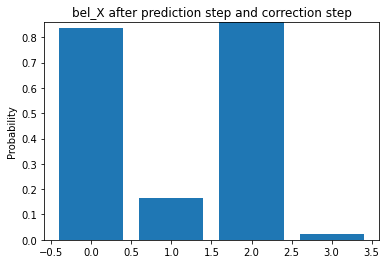

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

print("Initial belief of the network")

bel_Xc = 0.5  # bel(X=free)
bel_X = np.array([bel_Xc, 1-bel_Xc])  # % bel(X=free), bel(X=obs)

print("Conditional probabilities of the image processing technique")
P_ZcXc = 0.8      # P(Z=free|X=free)
P_ZdXc = 1-P_ZcXc  # P(Z=obs|X=free)
P_ZdXd = 0.9      # P(Z=obs|X=obs)
P_ZcXd = 1-P_ZdXd  # P(Z=free|X=obs)
p_ZX = np.array([[P_ZcXc, P_ZcXd], [P_ZdXc, P_ZdXd]])

print('Outcome probabilities when applying control command')
P_XcXcUc = 1          # P(X=free|X'=free,U'=move)
P_XdXcUc = 1-P_XcXcUc  # P(X=obs|X'=free,U'=move)
P_XcXdUc = 0.8        # P(X=free|X'=obs,U'=move)
P_XdXdUc = 1-P_XcXdUc  # P(X=obs|X'=obs,U'=move)
p_ZXUc = np.array([[P_XcXcUc, P_XdXcUc], [P_XcXdUc, P_XdXdUc]])

print('Outcome probabilities when not applying control command')
P_XcXcUn = 1          # P(X=free|X'=free,U'=not_move)
P_XdXcUn = 1-P_XcXcUn  # P(X=obs|X'=free,U'=not_move)
P_XcXdUn = 0          # P(X=free|X'=obs,U'=not_move)
P_XdXdUn = 1-P_XcXdUn  # P(X=obs|X'=obs,U'=not_move)
p_ZXUn = np.array([[P_XcXcUn, P_XdXcUn], [P_XcXdUn, P_XdXdUn]])

U = np.array(['not_move',  'move', 'move'])
Z = np.array(['obs', 'free', 'free'])

bel_X_steps_prediction = []
bel_X_steps_correction = []
for idx, u, z in zip(range(0, len(U)), U, Z):
    print('Prediction step: U({0})={1}'.format(idx, u))
    if u == 'move':
        belp_X = np.array([(P_XcXcUc*bel_X[0]) + (P_XcXdUc*bel_X[1]), 
                           (P_XdXcUc*bel_X[0]) + (P_XdXdUc*bel_X[1])]) #TODO 
    else:
        belp_X = np.array([(P_XcXcUn*bel_X[0]) + (P_XcXdUn*bel_X[1]), 
                           (P_XdXcUn*bel_X[0]) + (P_XdXdUn*bel_X[1])])  #TODO 
    bel_X_steps_prediction.append(belp_X)
    print("belp_X: ", belp_X)
    print('Correction step: Z({0}))={1}'.format(idx, z))
    if z == 'free':
        bel_X = np.array([P_ZcXc*belp_X[0],
                          P_ZcXd*belp_X[1]
        ])
    else:
        bel_X =  np.array([P_ZdXc*belp_X[0],
                          P_ZdXd*belp_X[1]
        ]) #TODO 
    bel_X = (1/np.sum(bel_X))*bel_X #TODO 
    bel_X_steps_correction.append(bel_X)
    print("bel_X: ", bel_X)

bel_X_steps_prediction = np.array(bel_X_steps_prediction)
bel_X_steps_correction = np.array(bel_X_steps_correction)

def barlist(n):
    return np.array([bel_X_steps_prediction[n], bel_X_steps_correction[n]]).flatten()


fig = plt.figure()
n = len(U)-1
x = range(0, bel_X.shape[0]*2)
print(x)

barcollection = plt.bar(x, barlist(0))

def animate(i):
    y = barlist(i+1)
    for i, b in enumerate(barcollection):
        print(i, b)
        b.set_height(y[i])


anim = animation.FuncAnimation(fig, animate, repeat=False, blit=False, frames=n,
                               interval=1000)
plt.ylabel("Probability")
plt.title('bel_X after prediction step and correction step')
# anim.save('bel_x.mp4', writer=animation.FFMpegWriter(fps=10))
plt.show()